<a href="https://colab.research.google.com/github/shruti123-web/INTM584_IES_/blob/main/Linear_Regression_Lec3_INTM575_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/BostonHousing.csv")

In [ ]:
df.shape

(506, 14)

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dor= df.iloc[[1,2],[1,2,5]]
dor

,zn,indus,rm
1,0.0,7.07,6.421
2,0.0,7.07,7.185


In [ ]:
cor= df.iloc[:,:13].corr()
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
dor= df.iloc[:,[1,2,3]]
dor

,zn,indus,chas
0,18.0,2.31,0
1,0.0,7.07,0
2,0.0,7.07,0
3,0.0,2.18,0
4,0.0,2.18,0
...,...,...,...
501,0.0,11.93,0
502,0.0,11.93,0
503,0.0,11.93,0
504,0.0,11.93,0


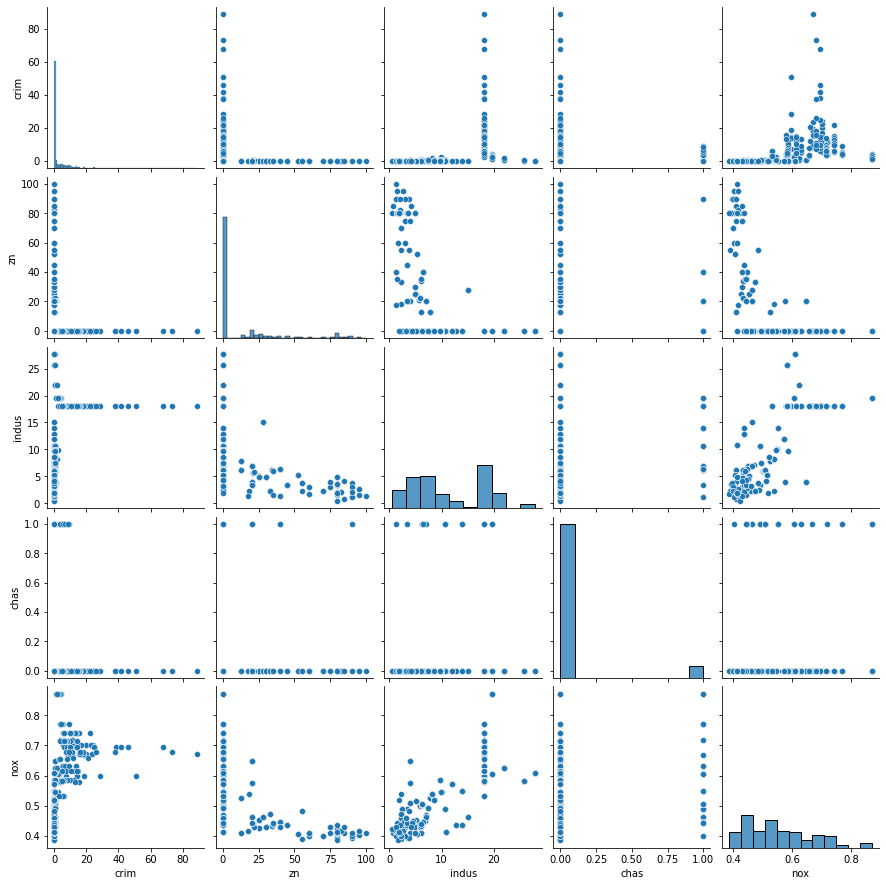

In [ ]:
sns.pairplot(df.iloc[:,:5])

In [ ]:
#!pip install imbalanced-learn
# check version number
#import imblearn
#oversample = SMOTE()

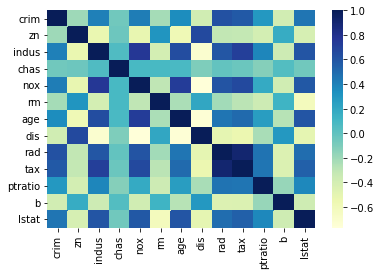

In [ ]:
sns.heatmap(cor,square = False, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

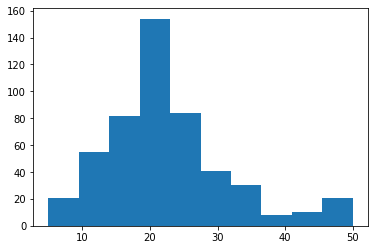

In [ ]:
plt.hist(df['medv'])

In [ ]:
df['logmedv'] = np.log(df['medv'])

In [ ]:
#df.head()

(array([  3.,   8.,  13.,  23.,  63., 100., 172.,  52.,  40.,  32.]),
 array([1.60943791, 1.83969642, 2.06995493, 2.30021344, 2.53047195,
        2.76073046, 2.99098897, 3.22124748, 3.45150599, 3.6817645 ,
        3.91202301]),
 <a list of 10 Patch objects>)

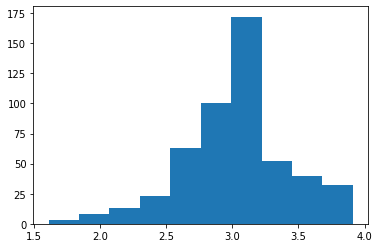

In [ ]:
plt.hist(df.logmedv)

In [ ]:
df['sqrtmedv'] = np.sqrt(df['medv'])

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,logmedv,sqrtmedv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054,4.898979
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693,4.647580
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740,5.890671
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556,5.779273
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059,6.016644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,3.109061,4.732864
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,3.025291,4.538722
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,3.173878,4.888763
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,3.091042,4.690416


(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <a list of 10 Patch objects>)

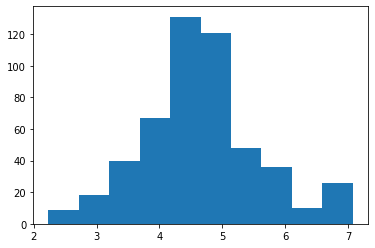

In [ ]:
plt.hist(df.sqrtmedv)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.shape

(506, 16)

In [ ]:
df1 = df.iloc[:,:13]

In [ ]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns

In [ ]:
vif

,VIF,Features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [ ]:
df1.drop(['ptratio','nox','rm','tax','b','age'],axis=1, inplace=True)

In [ ]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [ ]:
df1.corr() #again checking because of PCA-> PRINCIPLE COMPONENT ANALYSIS, FACTOR ANALYSIS, instead of taking many variables we will 
#take those that are significant
#high is 0.8 and above to take the decision of removing a variable, else above 0.6 is high

,crim,zn,indus,chas,dis,rad,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,-0.379670,0.625505,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,0.664408,-0.311948,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,-0.708027,0.595129,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,-0.099176,-0.007368,-0.053929
dis,-0.379670,0.664408,-0.708027,-0.099176,1.000000,-0.494588,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,-0.494588,1.000000,0.488676
lstat,0.455621,-0.412995,0.603800,-0.053929,-0.496996,0.488676,1.000000


In [ ]:
x = df1  ### Features
#y = df.medv  ### Labels
#y = df.medv
#y1 = df.logmedv #69% accuracy
y2 = df.sqrtmedv 

In [ ]:
x

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,2.4786,1,9.67
502,0.04527,0.0,11.93,0,2.2875,1,9.08
503,0.06076,0.0,11.93,0,2.1675,1,5.64
504,0.10959,0.0,11.93,0,2.3889,1,6.48


In [ ]:
y2

0      4.898979
1      4.647580
2      5.890671
3      5.779273
4      6.016644
         ...   
501    4.732864
502    4.538722
503    4.888763
504    4.690416
505    3.449638
Name: sqrtmedv, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y2, test_size = 0.3,random_state=5) #random set of train,test any no. can be there

In [ ]:
#x_train, y_train -> model ko diya equation samajhne ke liye
#x_test ko bina y_test ke run karenge, then compare with y_test

In [ ]:
df1.shape

(506, 7)

In [ ]:
x_train.head()

,crim,zn,indus,chas,dis,rad,lstat
445,10.67180,0.0,18.10,0,1.9879,24,23.98
428,7.36711,0.0,18.10,0,1.9356,24,21.52
481,5.70818,0.0,18.10,0,3.3317,24,7.74
55,0.01311,90.0,1.22,0,8.6966,5,4.81
488,0.15086,0.0,27.74,0,1.8209,4,18.06


In [ ]:
x_test.shape

(152, 7)

In [ ]:
y_train

445    3.435113
428    3.316625
481    4.868265
55     5.949790
488    3.898718
         ...   
486    4.370355
189    5.907622
495    4.806246
206    4.939636
355    4.538722
Name: sqrtmedv, Length: 354, dtype: float64

In [ ]:
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
lr.intercept_ #saare x 0 jab

6.654587397407944

In [ ]:
lr.coef_

array([-0.0192535 ,  0.00738335, -0.03094341,  0.20094978, -0.15682099,
       -0.00126061, -0.08590442])

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'dis', 'rad', 'lstat'], dtype='object')

In [ ]:
lr.score(x_test,y_test) # Coeffecient of determination - R^2 #60% industry ke hisaab se aachi hai, 65,70% theek hai

0.6593307899211132

In [ ]:
#normal distribution dekh ke sqrt vaala better tha par log vaale se RMSE kamm hai toh log vaala better hai
#medv ki scaling log ke through better hui hai
#but in real world these two are taken

In [ ]:
#taken log vaala dependent variable, accuracy badh gayi, y scale down ho gaya

In [ ]:
lr.score(x_train,y_train) #jab model ne seekha toh kis accuracy se seekha

0.6988044710143575

In [ ]:
#ager bahut kamm aa rahi hai model ki accuracy test vaale ki toh matlab overfitting

In [ ]:
pred = lr.predict(x_test)

In [ ]:
#pred

In [ ]:
#y_test

In [ ]:
x_test['pred'] = pred
x_test['actual'] = y_test

In [ ]:
x_test

,crim,zn,indus,chas,dis,rad,lstat,pred,actual
226,0.38214,0.0,6.20,0,3.2157,8,3.13,5.672126,6.131884
292,0.03615,80.0,4.95,0,5.1167,4,4.70,5.880190,5.282045
90,0.04684,0.0,3.41,0,3.0923,2,8.81,5.303892,4.753946
373,11.10810,0.0,18.10,0,1.1742,24,34.77,2.679352,3.714835
273,0.22188,20.0,6.96,1,4.3665,3,6.58,5.529774,5.932959
...,...,...,...,...,...,...,...,...,...
60,0.14932,25.0,5.13,0,7.2254,8,13.15,4.404734,4.324350
108,0.12802,0.0,8.56,0,2.4329,5,12.27,4.945367,4.449719
298,0.06466,70.0,2.24,0,7.8278,5,4.97,5.440052,4.743416
138,0.24980,0.0,21.89,0,1.6686,4,21.32,3.874230,3.646917


In [ ]:
y_test

226    6.131884
292    5.282045
90     4.753946
373    3.714835
273    5.932959
         ...   
60     4.324350
108    4.449719
298    4.743416
138    3.646917
370    7.071068
Name: sqrtmedv, Length: 152, dtype: float64

In [ ]:
from sklearn import metrics
print ("MSE", metrics.mean_squared_error(y_test,pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))

#RMSE-> 4 SE LESS, single digit mein hoti hai toh-> AACHI ACCURACY hoti hai
#log vaale se rmse badh gayi matlab kharab ho gaya yeh sqrt vaala as compared to log

MSE 0.32057385586775317
RMSE 0.566192419472173


In [ ]:
#x_train, x_test, y_train, y_test =train_test_split(x,y1, test_size = 0.2,random_state=4)

In [ ]:
#lr1 = LinearRegression().fit(x_train,y_train)

In [ ]:
#lr1.coef_

In [ ]:
#lr1.intercept_

In [ ]:
#lr1.score(x_test,y_test)

In [ ]:
#pred1 = lr1.predict(x_test)
#pred2= np.exp(pred1)

In [ ]:
#y_test

In [ ]:
#pred2

In [ ]:
# pred1 = lr1.predict(x_test)
# print ("MSE", metrics.mean_squared_error(y_test,pred2))
# print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred2)))

### Using StatsModel API
other way in place of linear regression

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,logmedv,sqrtmedv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054,4.898979
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693,4.647580
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740,5.890671
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556,5.779273
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059,6.016644


In [ ]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm

In [ ]:
#df1.drop(['ptratio','nox','tax','rm','age','b'],axis=1, inplace=True)
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [ ]:
df1['logmedv'] = np.log(df.medv)

In [ ]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat,logmedv
0,0.00632,18.0,2.31,0,4.0900,1,4.98,3.178054
1,0.02731,0.0,7.07,0,4.9671,2,9.14,3.072693
2,0.02729,0.0,7.07,0,4.9671,2,4.03,3.546740
3,0.03237,0.0,2.18,0,6.0622,3,2.94,3.508556
4,0.06905,0.0,2.18,0,6.0622,3,5.33,3.589059


In [ ]:
model = smf.ols("logmedv ~ crim+zn+indus+chas+dis+lstat", data=df1)
model_fit = model.fit()

In [ ]:
model_fit.summary() #can see the adj. r square

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logmedv   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     220.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          9.88e-137
Time:                        05:21:01   Log-Likelihood:                 62.615
No. Observations:                 506   AIC:                            -111.2
Df Residuals:                     499   BIC:                            -81.65
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8518      0.047     82.039      0.000       3.760       3.944
crim          -0.0106      0.001     -8.183      0.000      -0.013      -0.008
zn             0.0024      0.001      4.347      0.000       0.001       0.004
indus         -0.0106      0.002     -4.823      0.000      -0.015      -0.006
chas           0.1581      0.038      4.125      0.000       0.083       0.233
dis           -0.0555      0.007     -7.403      0.000      -0.070      -0.041
lstat         -0.0387      0.002    -21.654      0.000      -0.042      -0.035
==============================================================================
Omnibus:                       34.704   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.109
Skew:                           0.443   Prob(JB):                     1.98e-14
Kurtosis:                       4.486   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Durbin-Watson
#autocorrelation nahi hai
#hence assumption valid

In [ ]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


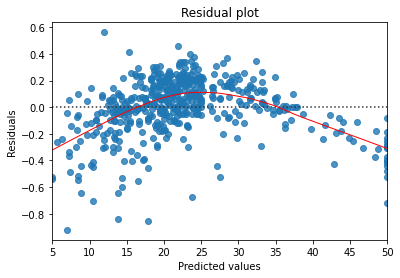

In [ ]:
import seaborn as sns
# seaborn residual plot
sns.residplot(df['medv'],model_fitted_y, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

In [ ]:
#id residuals in +ve side-> errors +ve hai-> actual-predicted -> pred ki choti value hai
#red line-> trend line
#saare +ve toh underfitting
#0 line hona aachi baad-> residuals 0 ke paas-> accuracy high

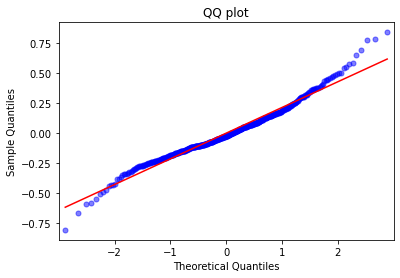

In [ ]:
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(model_residuals)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

In [ ]:
#red line-> regression line

(array([  2.,   5.,  16.,  87., 179., 136.,  48.,  24.,   5.,   4.]),
 array([-0.80499986, -0.64057814, -0.47615642, -0.3117347 , -0.14731298,
         0.01710874,  0.18153046,  0.34595218,  0.5103739 ,  0.67479562,
         0.83921734]),
 <a list of 10 Patch objects>)

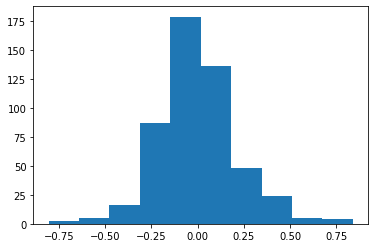

In [ ]:
plt.hist(model_residuals)
#residuals should be normally distributed-> around 0 zayada tabhi model accurate-> assumption

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


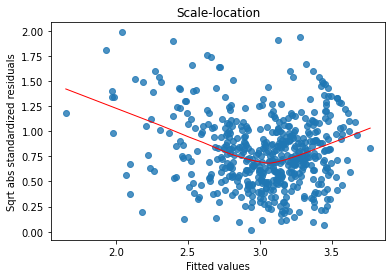

In [ ]:
# plot scale-location
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location');

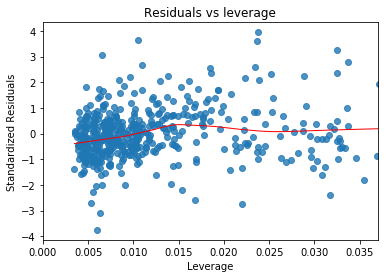

In [ ]:
# plot residuals vs high leverage points
sns.regplot(model_leverage, model_norm_residuals, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlim(xmin=0, xmax=0.037)
plt.xlabel('Leverage')
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs leverage");

In [ ]:
#leverage-> risk factor

### Additional links

Links to study
https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Power Transformation / Box -cox Transformation
https://www.google.com/search?sxsrf=ALeKk00ISEIVgSj-IxS7yKT2qJGNyXzxhA%3A1602436462648&ei=bj2DX8ugJ9mE4-EP2sqxuA0&q=box+cox+transformation+&oq=box+cox+transformation+&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIHCAAQyQMQQzICCAAyBAgAEEMyBAgAEEMyAggAMgQIABBDMgQIABBDMgQIABBDMgIIADoHCAAQRxCwA1CRIViRIWCVI2gBcAB4AIABlwGIAZcBkgEDMC4xmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=psy-ab&ved=0ahUKEwjLj4aBha3sAhVZwjgGHVplDNcQ4dUDCA0&uact=5


Assumption of LR
https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/#:~:text=Let's%20look%20at%20the%20important,predictor)%20variable(s).&text=The%20independent%20variables%20should%20not,phenomenon%20is%20known%20as%20multicollinearity

Diagnostic Plots
http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/
Stat 501
https://online.stat.psu.edu/stat501/

Lasso, Ridge and Elastic Net

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

Subset  regression  + Stepwise Regression

https://statisticsbyjim.com/regression/guide-stepwise-best-subsets-regression/

Regression by Example
http://3.droppdf.com/files/pjxkI/regression-analysis-by-example-5th-edition.pdf

In [ ]:
#logistic -> classification
#Lasso, Ridge and Elastic Net-> overfitted data ke liye